# GoogLeNet Implementation for 4 class histopathology custom dataset classification problem

## 1.  The purpose
The purpose behind this experiment is to create the most efficient model based on GoogLeNet architecture for dataset classification task. The reasons are:
* GoogLeNet is a lightweight yet high-performing CNN suitable for limited GPU environments.
* The torchvision implementation is stable and well-tested.
* Using the pretrained ImageNet weights ensures that:
    * the model starts with strong feature extraction capabilities,
    * training is faster,
    * the architecture is guaranteed to be correct (no risk of implementation bugs).

After loading the pretrained model, the final fully-connected layers and auxiliary classifiers were adapted to  4 class custom medical dataset.

## 2. Custom Dataset
A custom PyTorch dataset class was implemented to load image paths, map class names to labels, and apply preprocessing transforms.

Dataset Composition
* Training Set
** Class
** Chorionic villi	1391 Images
** Decidual tissue	926 Images
** Hemorrhage	1138 Images
** Trophoblastic tissue	700 Images

* Test Set
*(also used as validation through the pipeline)*
** Chorionic villi	390 Images
** Decidual tissue	349 Images
** Hemorrhage	432 Images
** Trophoblastic tissue	351 Images

The dataset is mildly imbalanced, but still usable without strict resampling techniques.

## 3. Data Preprocessing and Augmentation
Each image was resized to a fixed resolution and normalized using ImageNet mean and standard deviation, matching the pretrained model.

Training augmentations
* RandomHorizontalFlip
* RandomVerticalFlip
* ColorJitter (contrast/brightness)
* RandomRotation
* ToTensor()
* Normalize(mean, std)
These operations help improve generalization and reduce overfitting, especially with a limited medical dataset.

Validation and Test preprocessing
* Resize
* CenterCrop (optional)
* Normalize
No augmentation is applied during validation/testing.




##4. Model Architecture

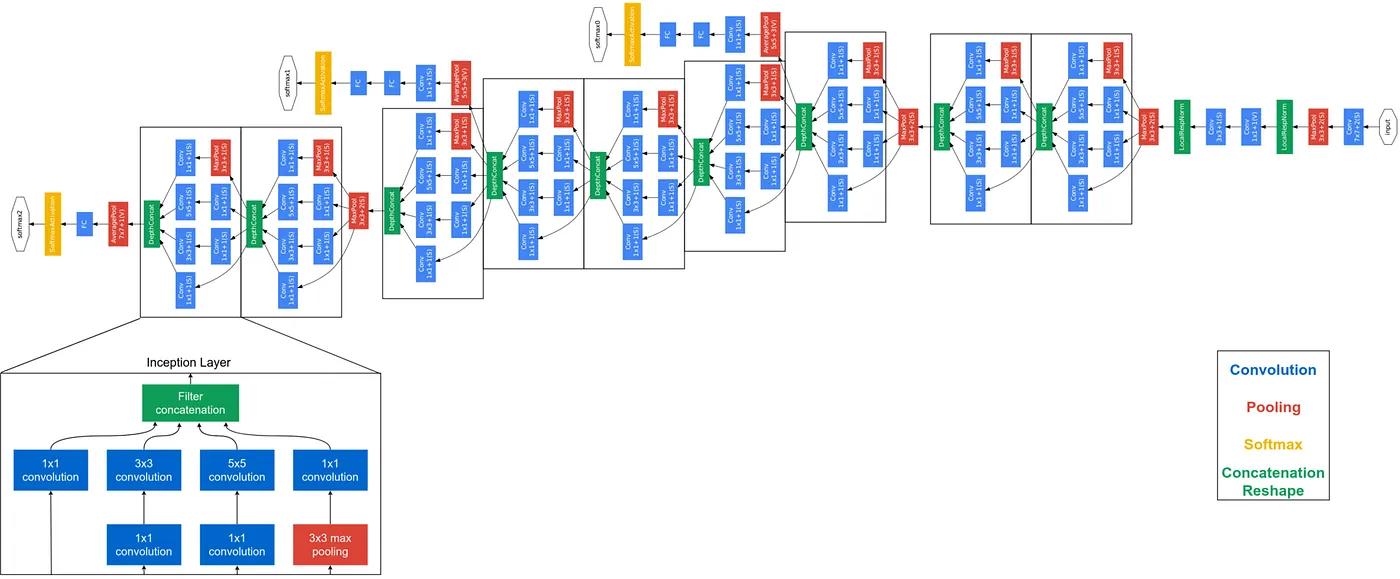

> **img source:** Szegedy, Christian & Vanhoucke, Vincent & Ioffe, Sergey & Shlens, Jon & Wojna, ZB. (2016). “Rethinking the Inception Architecture for Computer Vision”. 10.1109/CVPR.2016.308.

GoogLeNet is a deep convolutional neural network built around the Inception architecture, which processes visual information through multiple filter sizes in parallel to improve feature extraction efficiency. In its original form, GoogLeNet was trained on ImageNet and includes auxiliary classifiers that stabilize gradient flow during training.

### 4.1 GoogleNet Impelementation
This implementation adapts the PyTorch GoogLeNet model for a four class classification task by modifying only the classification layers while preserving the original Inception architecture. The network is initialized with ImageNet pretrained weights to provide strong feature extraction from the start. The final fully connected layer (model.fc) is replaced with a new linear layer matching the number of target classes, and both auxiliary classifiers (aux1.fc2 and aux2.fc2) are also redefined to output four logits instead of 1000 as in original ImageNet.

Unlike the original GoogLeNet, which was designed for ImageNet 1000 class output, this version customizes all three classification branches to the specific task and uses pretrained weights for transfer learning. The core convolutional and Inception blocks remain unchanged, allowing the model to retain the representational power of the original architecture while being fine-tuned for histopathology image classification.

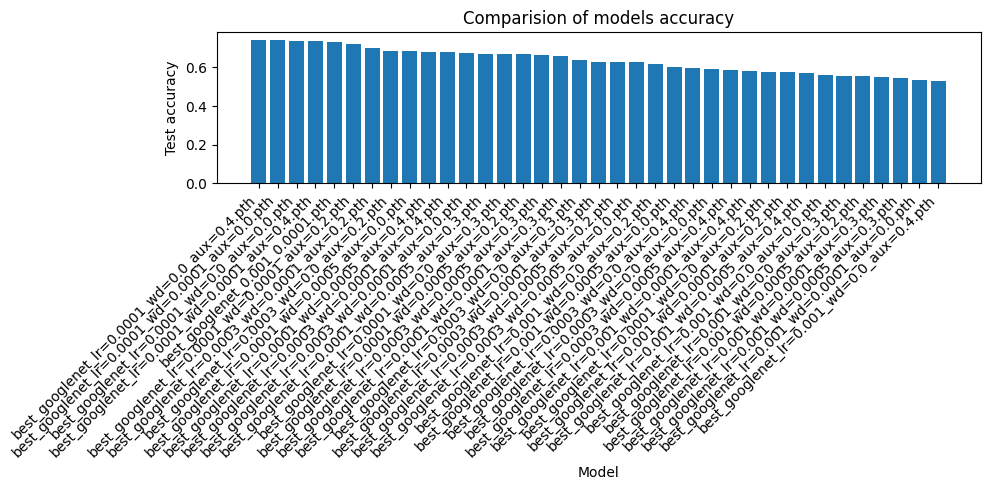

### 4.2. Best Hyperparameters Search Based on Grid Search

A grid search was performed to identify the best hyperparameters for fine-tuning GoogLeNet on the placental tissue dataset.
The tested parameters included:

* Learning rate: 0.001, 0.0003, 0.0001
* Weight decay: 0.0005, 0.0001, 0.0
* Auxiliary loss weight: 0.0, 0.2, 0.3, 0.4

Overall I have tested **37 model configurations** (all combinations of 3 learning rates, 3 weight decays, 4 auxiliary loss weights and baseline model best_googlenet_0.001_0.0001.pth).
Each model was trained using the same pipeline and evaluated on the test set with accuracy, macro-precision, macro-recall, and macro-F1.

| # | Model Name | Learning Rate | Weight Decay | Aux Weight |
|---|------------|----------------|--------------|-------------|
| 1 | best_googlenet_lr=0.0001_wd=0.0_aux=0.4.pth | 0.0001 | 0.0 | 0.4 |
| 2 | best_googlenet_lr=0.0001_wd=0.0001_aux=0.0.pth | 0.0001 | 0.0001 | 0.0 |
| 3 | best_googlenet_lr=0.0001_wd=0.0_aux=0.0.pth | 0.0001 | 0.0 | 0.0 |
| 4 | best_googlenet_lr=0.0001_wd=0.0001_aux=0.4.pth | 0.0001 | 0.0001 | 0.4 |
| 5 | best_googlenet_0.001_0.0001.pth | 0.001 | 0.0001 | 0.3* |
| 6 | best_googlenet_lr=0.0001_wd=0.0001_aux=0.2.pth | 0.0001 | 0.0001 | 0.2 |
| 7 | best_googlenet_lr=0.0003_wd=0.0001_aux=0.2.pth | 0.0003 | 0.0001 | 0.2 |
| 8 | best_googlenet_lr=0.0003_wd=0.0_aux=0.2.pth | 0.0003 | 0.0 | 0.2 |
| 9 | best_googlenet_lr=0.0001_wd=0.0005_aux=0.0.pth | 0.0001 | 0.0005 | 0.0 |
| 10 | best_googlenet_lr=0.0001_wd=0.0005_aux=0.4.pth | 0.0001 | 0.0005 | 0.4 |
| 11 | best_googlenet_lr=0.0003_wd=0.0001_aux=0.4.pth | 0.0003 | 0.0001 | 0.4 |
| 12 | best_googlenet_lr=0.0003_wd=0.0001_aux=0.0.pth | 0.0003 | 0.0001 | 0.0 |
| 13 | best_googlenet_lr=0.0001_wd=0.0005_aux=0.3.pth | 0.0001 | 0.0005 | 0.3 |
| 14 | best_googlenet_lr=0.0001_wd=0.0_aux=0.3.pth | 0.0001 | 0.0 | 0.3 |
| 15 | best_googlenet_lr=0.0001_wd=0.0005_aux=0.2.pth | 0.0001 | 0.0005 | 0.2 |
| 16 | best_googlenet_lr=0.0003_wd=0.0005_aux=0.3.pth | 0.0003 | 0.0005 | 0.3 |
| 17 | best_googlenet_lr=0.0001_wd=0.0001_aux=0.3.pth | 0.0001 | 0.0001 | 0.3 |
| 18 | best_googlenet_lr=0.0003_wd=0.0_aux=0.3.pth | 0.0003 | 0.0 | 0.3 |
| 19 | best_googlenet_lr=0.0003_wd=0.0001_aux=0.3.pth | 0.0003 | 0.0001 | 0.3 |
| 20 | best_googlenet_lr=0.0003_wd=0.0005_aux=0.2.pth | 0.0003 | 0.0005 | 0.2 |
| 21 | best_googlenet_lr=0.0003_wd=0.0005_aux=0.0.pth | 0.0003 | 0.0005 | 0.0 |
| 22 | best_googlenet_lr=0.001_wd=0.0_aux=0.2.pth | 0.001 | 0.0 | 0.2 |
| 23 | best_googlenet_lr=0.001_wd=0.0005_aux=0.0.pth | 0.001 | 0.0005 | 0.0 |
| 24 | best_googlenet_lr=0.0003_wd=0.0_aux=0.4.pth | 0.0003 | 0.0 | 0.4 |
| 25 | best_googlenet_lr=0.0003_wd=0.0_aux=0.0.pth | 0.0003 | 0.0 | 0.0 |
| 26 | best_googlenet_lr=0.0003_wd=0.0005_aux=0.4.pth | 0.0003 | 0.0005 | 0.4 |
| 27 | best_googlenet_lr=0.001_wd=0.0001_aux=0.4.pth | 0.001 | 0.0001 | 0.4 |
| 28 | best_googlenet_lr=0.0001_wd=0.0_aux=0.2.pth | 0.0001 | 0.0 | 0.2 |
| 29 | best_googlenet_lr=0.001_wd=0.0001_aux=0.2.pth | 0.001 | 0.0001 | 0.2 |
| 30 | best_googlenet_lr=0.001_wd=0.0005_aux=0.4.pth | 0.001 | 0.0005 | 0.4 |
| 31 | best_googlenet_lr=0.001_wd=0.0_aux=0.0.pth | 0.001 | 0.0 | 0.0 |
| 32 | best_googlenet_lr=0.001_wd=0.0_aux=0.3.pth | 0.001 | 0.0 | 0.3 |
| 33 | best_googlenet_lr=0.001_wd=0.0005_aux=0.2.pth | 0.001 | 0.0005 | 0.2 |
| 34 | best_googlenet_lr=0.001_wd=0.0001_aux=0.3.pth | 0.001 | 0.0001 | 0.3 |
| 35 | best_googlenet_lr=0.001_wd=0.0005_aux=0.3.pth | 0.001 | 0.0005 | 0.3 |
| 36 | best_googlenet_lr=0.001_wd=0.0001_aux=0.0.pth | 0.001 | 0.0001 | 0.0 |
| 37 | best_googlenet_lr=0.001_wd=0.0_aux=0.4.pth | 0.001 | 0.0 | 0.4 |


### 4.3 Best Model

The top-performing configuration was:

```
GoogLeNet (pretrained)
lr = 0.0001
weight_decay = 0.0
aux_loss_weight = 0.4
optimizer = SGD + momentum
```

Performance:

* Test accuracy: 0.7445

* Macro-F1: 0.7241

* Macro-precision: 0.8067

* Macro-recall: 0.7276


Low learning rate (0.0001) ensured stable fine-tuning.

No weight decay allowed better adaptation to the small medical dataset.

Strong auxiliary loss improved feature extraction in earlier layers.

Higher learning rates (0.001) consistently underperformed.


**best_googlenet_lr=0.0001_wd=0.0_aux=0.4.pth** was selected as the final model due to the best overall balance of accuracy and macro-F1 across all four tissue classes.

### 4.4 Final model optimization – short paragraph

| Model Variant                          | Test Loss | Accuracy | Macro Precision | Macro Recall | Macro F1 |
|----------------------------------------|-----------|----------|-----------------|--------------|----------|
| 20 epochs                              | 0.8592    | 0.7445   | 0.8067          | 0.7276       | 0.7241   |
| 40 epochs                              | 0.5466    | 0.8365   | 0.8513          | 0.8270       | 0.8276   |
| 40 epochs + class weights              | 0.5457    | 0.8524   | 0.8668          | 0.8438       | 0.8454   |
| 40 epochs + class weights + augmentation | 0.5762  | 0.8332   | 0.8485          | 0.8245       | 0.8221   |


The final performance improvements were achieved through a combination of longer training, class weighting, and controlled data augmentation. Extending the training to 40 epochs allowed the model to fully converge, substantially improving accuracy and macro-F1 compared to the initial 20-epoch version. Introducing class weights further enhanced recall and F1 for underrepresented and visually complex tissue classes, resulting in the strongest overall scores. Additional augmentations were tested, but more aggressive transformations decreased performance, indicating that the model benefits most from moderate augmentation and balanced class weighting rather than heavy input distortion.



In [25]:
print("name: Ewa Bielawska\nStudent ID: 2025130909\nMajor: Computer Science & AI")

name: Ewa Bielawska
Student ID: 2025130909
Major: Computer Science & AI


In [1]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [2]:
!nvidia-smi

Mon Dec  8 16:08:28 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   48C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
import os
import csv
import copy
from time import time
import random

import pandas as pd
import numpy as np
from PIL import Image
import itertools

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split, Subset

from torchvision import transforms, models

import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix, classification_report

In [4]:
print('Listing contents of POC_Dataset directory:')
!ls -R "/content/drive/MyDrive/googlenet/POC_Dataset"

Listing contents of POC_Dataset directory:
/content/drive/MyDrive/googlenet/POC_Dataset:
Testing  Training

/content/drive/MyDrive/googlenet/POC_Dataset/Testing:
Chorionic_villi  Decidual_tissue  Hemorrhage  Trophoblastic_tissue

/content/drive/MyDrive/googlenet/POC_Dataset/Testing/Chorionic_villi:
100.jpg  179.jpg  23.jpg   303.jpg  373.jpg  433.jpg  495.jpg  544.jpg	593.jpg
101.jpg  17.jpg   240.jpg  309.jpg  374.jpg  436.jpg  497.jpg  545.jpg	595.jpg
103.jpg  180.jpg  242.jpg  30.jpg   376.jpg  438.jpg  498.jpg  546.jpg	596.jpg
104.jpg  188.jpg  244.jpg  311.jpg  379.jpg  439.jpg  499.jpg  547.jpg	597.jpg
107.jpg  195.jpg  246.jpg  312.jpg  37.jpg   43.jpg   49.jpg   548.jpg	598.jpg
108.jpg  196.jpg  247.jpg  313.jpg  380.jpg  440.jpg  500.jpg  54.jpg	600.jpg
109.jpg  197.jpg  248.jpg  315.jpg  381.jpg  441.jpg  501.jpg  550.jpg	62.jpg
10.jpg	 198.jpg  249.jpg  31.jpg   382.jpg  442.jpg  502.jpg  551.jpg	63.jpg
110.jpg  199.jpg  24.jpg   321.jpg  383.jpg  444.jpg  503.jpg  552.jpg	6

In [5]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# my path: /content/drive/MyDrive/googlenet/POC_Dataset/
#   training/Chorionic_villi/...
#   training/Decidual_tissue/...
#   training/Hemorrhage/...
#   training/Trophoblastic_tissue/...
#   testing/Chorionic_villi/...

data_root = "/content/drive/MyDrive/googlenet/POC_Dataset"

IMG_SIZE = 224
NUM_CLASSES = 4
BATCH_SIZE = 32
NUM_WORKERS = 2
NUM_EPOCHS = 40
VAL_RATIO = 0.2
WEIGHT_DECAY = 0.0
LR = 0.0001
AUX_WEIGHT = 0.4

random.seed(42)
np.random.seed(42)
torch.manual_seed(42)
torch.cuda.manual_seed_all(42)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

class_names = [
    "Chorionic_villi",
    "Decidual_tissue",
    "Hemorrhage",
    "Trophoblastic_tissue",
]

class_to_idx = {cls_name: i for i, cls_name in enumerate(class_names)}


Using device: cuda


In [6]:
class BrainMRIDataset(Dataset):
    def __init__(self, root_dir, transform=None):

        self.root_dir = root_dir
        self.transform = transform
        self.class_to_idx = class_to_idx
        self.samples = []

        for class_name, idx in self.class_to_idx.items():
            class_dir = os.path.join(root_dir, class_name)
            if not os.path.isdir(class_dir):
                continue
            for fname in os.listdir(class_dir):
                if fname.lower().endswith((".png", ".jpg", ".jpeg", ".tif", ".bmp")):
                    path = os.path.join(class_dir, fname)
                    self.samples.append((path, idx))

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, index):
        img_path, label = self.samples[index]

        image = Image.open(img_path)
        image = image.convert("RGB")

        if self.transform is not None:
            image = self.transform(image)

        label = torch.tensor(label, dtype=torch.long)

        return image, label

In [7]:
imagenet_mean = [0.485, 0.456, 0.406]
imagenet_std = [0.229, 0.224, 0.225]

train_transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ColorJitter(brightness=0.1, contrast=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=imagenet_mean, std=imagenet_std),
])

test_transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize(mean=imagenet_mean, std=imagenet_std),
])


In [8]:
class_counts = np.array([1391, 926, 1138, 700], dtype=np.float32)

class_weights = 1.0 / class_counts
class_weights = class_weights / class_weights.sum() * len(class_counts)

class_weights_tensor = torch.tensor(class_weights, dtype=torch.float32).to(device)
print("Class weights:", class_weights_tensor)


Class weights: tensor([0.7003, 1.0520, 0.8560, 1.3916], device='cuda:0')


In [9]:
train_root = os.path.join(data_root, "Training")
test_root = os.path.join(data_root, "Testing")

full_train_dataset_for_split = BrainMRIDataset(root_dir=train_root, transform=None)

num_total = len(full_train_dataset_for_split)
num_val = int(num_total * VAL_RATIO)
num_train = num_total - num_val

try:
    train_subset, val_subset = random_split(full_train_dataset_for_split, [num_train, num_val])
except ValueError as e:
    if "num_samples should be a positive integer" in str(e):
        print("\nError: No samples found in the training dataset. Please check the 'data_root' path and the dataset structure.")
        print(f"Expected train_root: {train_root}")
        print(f"Expected test_root: {test_root}")
        print("Current class_names: ", class_names)
        print("Current data_root: ", data_root)
        print("\nListing content of data_root:")
        !ls -R "{data_root}"
    raise e

train_indices = train_subset.indices
val_indices = val_subset.indices

train_dataset = Subset(
    BrainMRIDataset(root_dir=train_root, transform=train_transform),
    train_indices
)

val_dataset = Subset(
    BrainMRIDataset(root_dir=train_root, transform=test_transform),
    val_indices
)

test_dataset = BrainMRIDataset(root_dir=test_root, transform=test_transform)

print(f"Train size: {len(train_dataset)}, Val size: {len(val_dataset)}, Test size: {len(test_dataset)}")

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True,
                          num_workers=NUM_WORKERS, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False,
                        num_workers=NUM_WORKERS, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False,
                         num_workers=NUM_WORKERS, pin_memory=True)


Train size: 3324, Val size: 831, Test size: 1511


In [10]:
weights = models.GoogLeNet_Weights.IMAGENET1K_V1
print(weights.transforms())

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)


In [11]:
def create_googlenet(num_classes=4, pretrained=True):
    weights = models.GoogLeNet_Weights.IMAGENET1K_V1 if pretrained else None
    model = models.googlenet(weights=weights, aux_logits=True)

    in_features_main = model.fc.in_features
    model.fc = nn.Linear(in_features_main, num_classes)

    # aux1
    if model.aux1 is not None:
        in_features_aux1 = model.aux1.fc2.in_features
        model.aux1.fc2 = nn.Linear(in_features_aux1, num_classes)

    # aux2
    if model.aux2 is not None:
        in_features_aux2 = model.aux2.fc2.in_features
        model.aux2.fc2 = nn.Linear(in_features_aux2, num_classes)

    return model

In [12]:
def accuracy_from_logits(logits, labels):
    preds = torch.argmax(logits, dim=1)
    correct = (preds == labels).sum().item()
    total = labels.size(0)
    return correct, total


def train_one_epoch(model, criterion, optimizer, dataloader, device, aux_weight=0.3):
    model.train()
    running_loss = 0.0
    running_correct = 0
    running_total = 0

    for images, labels in dataloader:
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model(images)

        # GoogLeNet: tuple (main, aux2, aux1)
        if isinstance(outputs, tuple):
            main_logits = outputs[0]
            aux2_logits = outputs[1]
            aux1_logits = outputs[2]

            loss_main = criterion(main_logits, labels)
            loss_aux1 = criterion(aux1_logits, labels)
            loss_aux2 = criterion(aux2_logits, labels)

            #  "double loss function"
            if aux_weight > 0.0:
                loss = loss_main + aux_weight * loss_aux1 + aux_weight * loss_aux2
            else:
                # aux_weight == 0.0 igore auxiliary
                loss = loss_main

            logits_for_acc = main_logits
        else:
            loss = criterion(outputs, labels)
            logits_for_acc = outputs

        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        correct, total = accuracy_from_logits(logits_for_acc, labels)
        running_correct += correct
        running_total += total

    epoch_loss = running_loss / running_total
    epoch_acc = running_correct / running_total
    return epoch_loss, epoch_acc

@torch.no_grad()
def evaluate(model, criterion, dataloader, device):
    model.eval()
    running_loss = 0.0
    running_correct = 0
    running_total = 0

    for images, labels in dataloader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        if isinstance(outputs, tuple):
            logits = outputs[0]
        else:
            logits = outputs

        loss = criterion(logits, labels)
        running_loss += loss.item() * images.size(0)

        correct, total = accuracy_from_logits(logits, labels)
        running_correct += correct
        running_total += total

    epoch_loss = running_loss / running_total
    epoch_acc = running_correct / running_total
    return epoch_loss, epoch_acc

In [13]:
def train_model_experiment(
    lr=LR,
    weight_decay=WEIGHT_DECAY,
    num_epochs=NUM_EPOCHS,
    name="exp",
    aux_weight=AUX_WEIGHT,
    early_stopping_patience=7,

):
    print(f"\n>>Training strats\n{name} | lr={lr} | wd={weight_decay} | aux={aux_weight} ")

    model = create_googlenet(NUM_CLASSES, pretrained=True).to(device)
    criterion = nn.CrossEntropyLoss(weight=class_weights_tensor)

    optimizer = optim.SGD(
        model.parameters(),
        lr=lr,
        momentum=0.9,
        weight_decay=weight_decay
    )

    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

    best_wts = copy.deepcopy(model.state_dict())
    best_val_acc = 0.0

    history = {
        "train_loss": [],
        "train_acc": [],
        "val_loss": [],
        "val_acc": [],
    }

    epochs_without_improvement = 0

    for epoch in range(num_epochs):
        t0 = time()

        train_loss, train_acc = train_one_epoch(
            model, criterion, optimizer, train_loader, device,
            aux_weight=aux_weight,
        )
        val_loss, val_acc = evaluate(model, criterion, val_loader, device)
        scheduler.step()

        history["train_loss"].append(train_loss)
        history["train_acc"].append(train_acc)
        history["val_loss"].append(val_loss)
        history["val_acc"].append(val_acc)

        improved = False
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            best_wts = copy.deepcopy(model.state_dict())
            torch.save(best_wts, f"best_{NUM_EPOCHS}_{name}.pth")
            epochs_without_improvement = 0
            improved = True
        else:
            epochs_without_improvement += 1

        dt = time() - t0
        print(
            f"Epoch [{epoch+1}/{num_epochs}] "
            f"train loss {train_loss:.4f} acc {train_acc:.4f} | "
            f"val loss {val_loss:.4f} acc {val_acc:.4f} | "
            f"{dt:.1f}s "
            f"{'[best so far]' if improved else ''}"
        )

        if early_stopping_patience is not None and epochs_without_improvement >= early_stopping_patience:
            print(f"\nEarly stopping triggered after {epoch+1} epochs "
                  f"(no val_acc improvement for {early_stopping_patience} epochs).")
            break

    print(f"\nBest val_acc for {name}: {best_val_acc:.4f}")
    model.load_state_dict(best_wts)
    return model, best_val_acc, history

@torch.no_grad()
def evaluate(model, criterion, dataloader, device):
    model.eval()
    total_loss = 0.0
    total_correct = 0
    total_samples = 0

    for images, labels in dataloader:
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)

        # GoogLeNet retuerns tuple: (main, aux1, aux2)
        if isinstance(outputs, tuple):
            outputs = outputs[0]

        loss = criterion(outputs, labels)
        total_loss += loss.item() * images.size(0)
        _, preds = torch.max(outputs, dim=1)
        total_correct += (preds == labels).sum().item()
        total_samples += labels.size(0)

    avg_loss = total_loss / total_samples
    avg_acc = total_correct / total_samples

    return avg_loss, avg_acc


In [14]:
all_results = []

lr = LR
wd = WEIGHT_DECAY
aux_w = AUX_WEIGHT
exp_name = "googlenetv3"

model_exp, best_val_acc, history = train_model_experiment(
    lr=lr,
    weight_decay=wd,
    num_epochs=NUM_EPOCHS,
    name=exp_name,
    aux_weight=aux_w,
)

all_results.append({
    "experiment": exp_name,
    "lr": lr,
    "weight_decay": wd,
    "aux_weight": aux_w,
    "best_val_acc": best_val_acc,
})

df_results = pd.DataFrame(all_results)
df_results = df_results.sort_values(by="best_val_acc", ascending=False).reset_index(drop=True)


>>Training strats
googlenetv3 | lr=0.0001 | wd=0.0 | aux=0.4 
Downloading: "https://download.pytorch.org/models/googlenet-1378be20.pth" to /root/.cache/torch/hub/checkpoints/googlenet-1378be20.pth


100%|██████████| 49.7M/49.7M [00:00<00:00, 113MB/s]
/usr/local/lib/python3.12/dist-packages/torchvision/models/googlenet.py:341: UserWarning: auxiliary heads in the pretrained googlenet model are NOT pretrained, so make sure to train them
  warnings.warn(


Epoch [1/40] train loss 2.4903 acc 0.3878 | val loss 1.2204 acc 0.6185 | 723.2s [best so far]
Epoch [2/40] train loss 2.2408 acc 0.6465 | val loss 1.0572 acc 0.7593 | 25.4s [best so far]
Epoch [3/40] train loss 2.0080 acc 0.7512 | val loss 0.9173 acc 0.7906 | 25.7s [best so far]
Epoch [4/40] train loss 1.8067 acc 0.7915 | val loss 0.7829 acc 0.8231 | 25.9s [best so far]
Epoch [5/40] train loss 1.6355 acc 0.8162 | val loss 0.6851 acc 0.8424 | 26.0s [best so far]
Epoch [6/40] train loss 1.4953 acc 0.8288 | val loss 0.6136 acc 0.8508 | 25.2s [best so far]
Epoch [7/40] train loss 1.3726 acc 0.8387 | val loss 0.5455 acc 0.8688 | 25.0s [best so far]
Epoch [8/40] train loss 1.3144 acc 0.8472 | val loss 0.5344 acc 0.8736 | 25.5s [best so far]
Epoch [9/40] train loss 1.2997 acc 0.8478 | val loss 0.5360 acc 0.8773 | 25.1s [best so far]
Epoch [10/40] train loss 1.2880 acc 0.8532 | val loss 0.5225 acc 0.8821 | 25.1s [best so far]
Epoch [11/40] train loss 1.3000 acc 0.8442 | val loss 0.5183 acc 0.8

In [15]:
inv_mean = np.array(imagenet_mean)
inv_std = np.array(imagenet_std)

def denormalize(img_tensor):
    img = img_tensor.cpu().numpy()
    img = np.transpose(img, (1, 2, 0))  # C,H,W -> H,W,C
    img = img * inv_std + inv_mean
    img = np.clip(img, 0, 1)
    return img

def show_batch(dataloader, n_images=16, with_labels=True, preds=None):
    images, labels = next(iter(dataloader))
    n_images = min(n_images, images.size(0))

    cols = 4
    rows = int(np.ceil(n_images / cols))

    plt.figure(figsize=(3 * cols, 3 * rows))

    for i in range(n_images):
        img = denormalize(images[i])
        label_idx = labels[i].item()
        title = ""
        if with_labels:
            title = f"GT: {class_names[label_idx]}"
        if preds is not None:
            title += f"\nPred: {class_names[preds[i]]}"

        plt.subplot(rows, cols, i + 1)
        plt.imshow(img)
        plt.title(title, fontsize=9)
        plt.axis("off")

    plt.tight_layout()
    plt.show()

In [16]:
@torch.no_grad()
def get_all_preds(model, dataloader, device):
    model.eval()
    all_logits = []
    all_labels = []

    for images, labels in dataloader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        if isinstance(outputs, tuple):
            logits = outputs[0]
        else:
            logits = outputs

        all_logits.append(logits.cpu())
        all_labels.append(labels.cpu())

    all_logits = torch.cat(all_logits, dim=0)
    all_labels = torch.cat(all_labels, dim=0)

    _, all_preds = torch.max(all_logits, dim=1)

    return all_labels.numpy(), all_preds.numpy(), all_logits.numpy()

In [17]:
def plot_confusion_matrix(y_true, y_pred, class_names, normalize=False):
    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1, keepdims=True)

    plt.figure(figsize=(6, 5))
    plt.imshow(cm, interpolation="nearest")
    title = "Confusion Matrix"
    if normalize:
        title += " (normalized)"
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45, ha="right")
    plt.yticks(tick_marks, class_names)

    fmt = ".2f" if normalize else "d"
    thresh = cm.max() / 2.0
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(
                j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black"
            )

    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.tight_layout()
    plt.show()

def print_classification_report(y_true, y_pred, class_names):
    report = classification_report(
        y_true,
        y_pred,
        target_names=class_names,
        digits=4
    )
    print(report)

In [18]:
def plot_learning_curves(history, title_prefix=""):
    epochs = range(1, len(history["train_loss"]) + 1)

    # Loss
    plt.figure(figsize=(6, 4))
    plt.plot(epochs, history["train_loss"], label="Train loss")
    plt.plot(epochs, history["val_loss"], label="Val loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title(f"{title_prefix} Loss curves")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Accuracy
    plt.figure(figsize=(6, 4))
    plt.plot(epochs, history["train_acc"], label="Train acc")
    plt.plot(epochs, history["val_acc"], label="Val acc")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title(f"{title_prefix} Accuracy curves")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

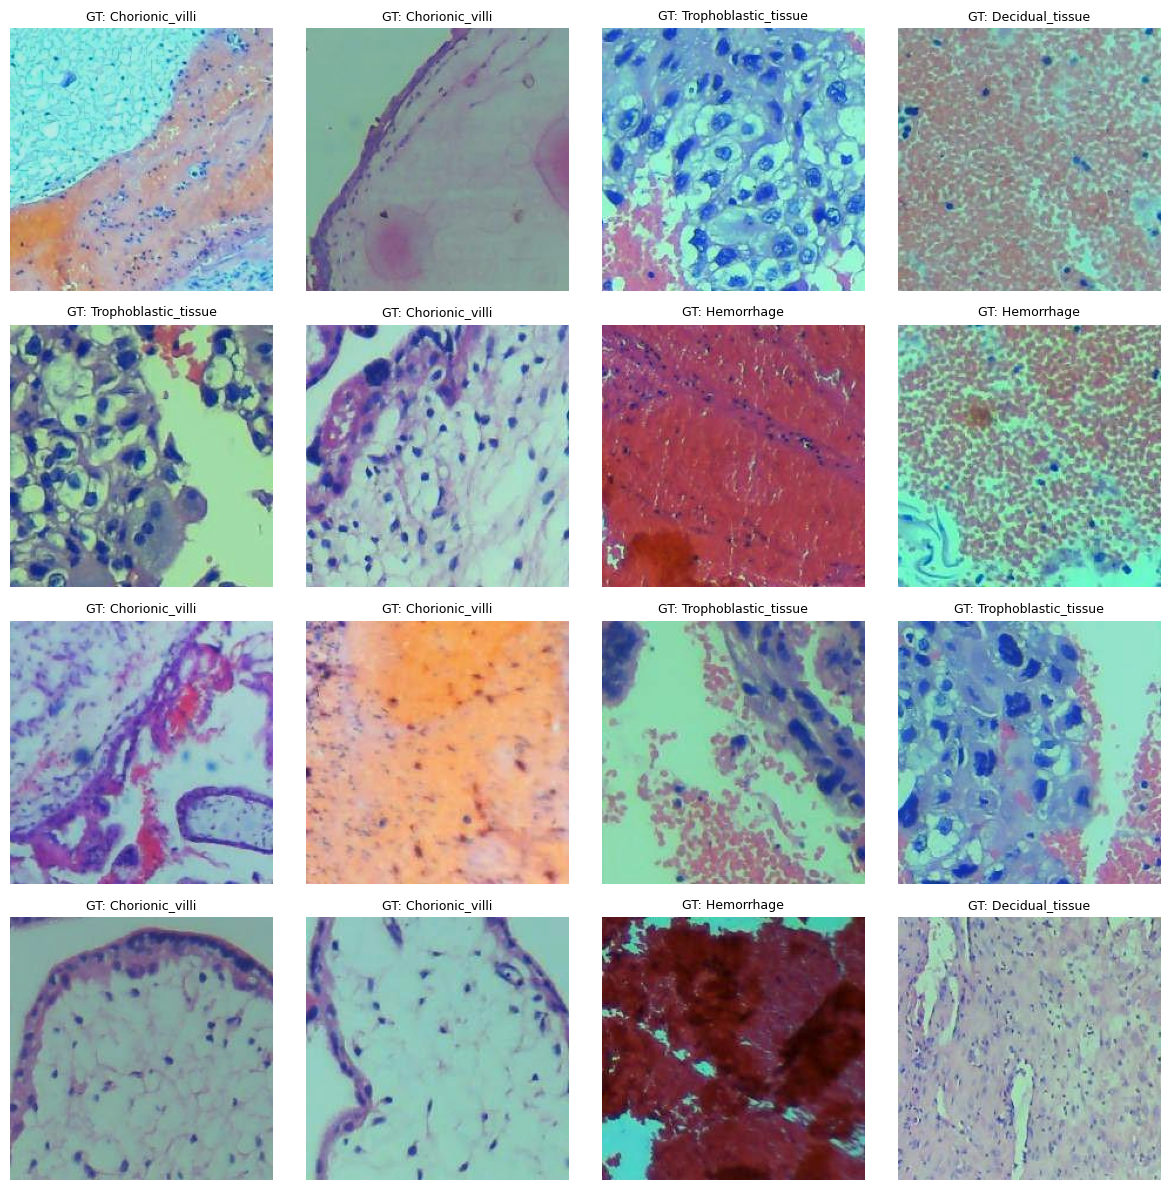

In [19]:
show_batch(train_loader, n_images=16)


In [20]:
!cp -r /content/*.pth /content/drive/MyDrive/googlenet/


In [21]:
@torch.no_grad()
def test_model(model, dataloader, device):
    criterion = nn.CrossEntropyLoss()
    test_loss, test_acc = evaluate(model, criterion, dataloader, device)
    print(f"TEST | loss: {test_loss:.4f} | acc: {test_acc:.4f}")
    return test_loss, test_acc

TEST | loss: 0.5457 | acc: 0.8524
Precision (macro): 0.8668
Recall (macro):    0.8438
F1-score (macro):  0.8454


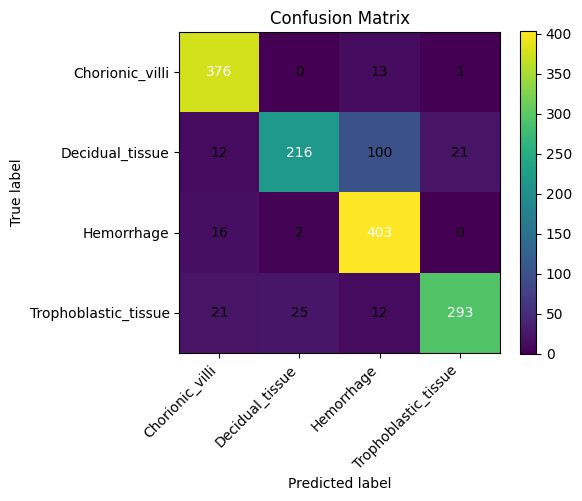

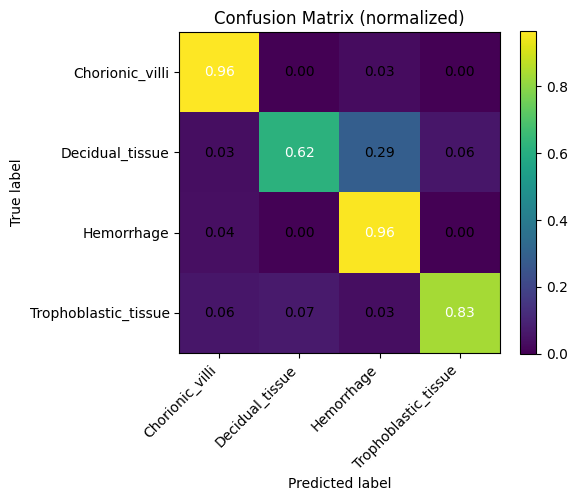

                      precision    recall  f1-score   support

     Chorionic_villi     0.8847    0.9641    0.9227       390
     Decidual_tissue     0.8889    0.6189    0.7297       349
          Hemorrhage     0.7633    0.9572    0.8493       421
Trophoblastic_tissue     0.9302    0.8348    0.8799       351

            accuracy                         0.8524      1511
           macro avg     0.8668    0.8438    0.8454      1511
        weighted avg     0.8624    0.8524    0.8477      1511



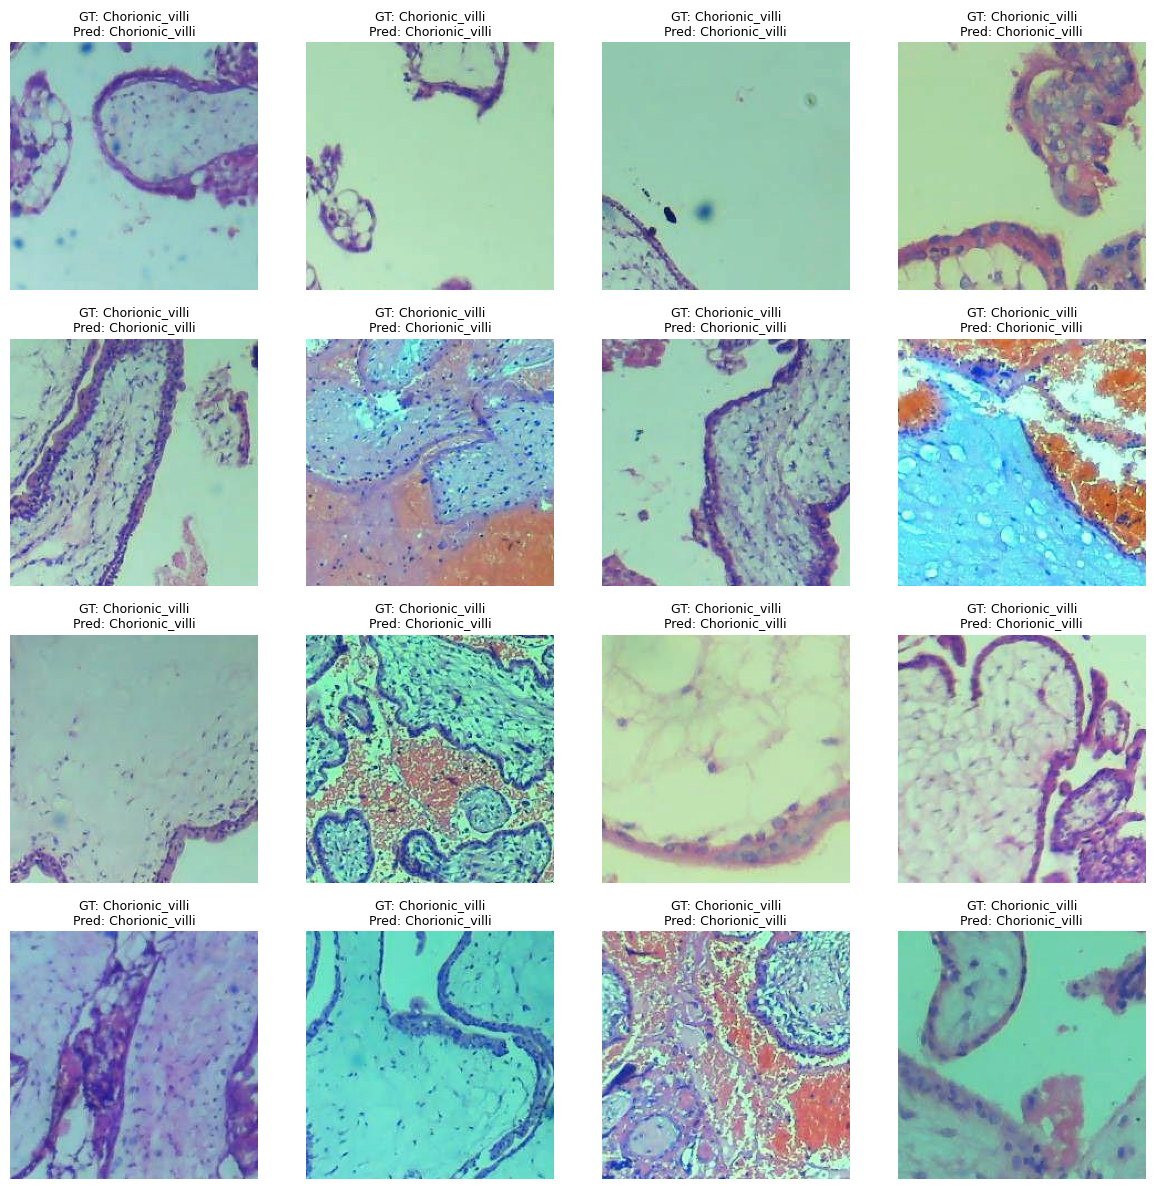

In [22]:
models_dir = "/content/drive/MyDrive/googlenet/test_data"
results_csv = "/content/drive/MyDrive/googlenet/model_result.csv"
cm_dir = "/content/drive/MyDrive/googlenet/conf_matrix"
plot_path = "/content/drive/MyDrive/googlenet/plot.png"

model_name = exp_name

if not os.path.exists(cm_dir):
    os.makedirs(cm_dir)

if not os.path.exists(results_csv):
    with open(results_csv, mode="w", newline="") as file:
        writer = csv.writer(file)
        writer.writerow(["model_name", "test_loss", "test_acc", "precision", "recall", "f1"])

model_exp.eval()

test_loss, test_acc = test_model(model_exp, test_loader, device)
y_true, y_pred, y_logits = get_all_preds(model_exp, test_loader, device)
y_true = np.array(y_true)
y_pred = np.array(y_pred)

precision, recall, f1, _ = precision_recall_fscore_support(
    y_true, y_pred, average="macro", zero_division=0
)
print(f"Precision (macro): {precision:.4f}")
print(f"Recall (macro):    {recall:.4f}")
print(f"F1-score (macro):  {f1:.4f}")

with open(results_csv, mode="a", newline="") as file:
    writer = csv.writer(file)
    writer.writerow([
        model_name,
        test_loss,
        test_acc,
        precision,
        recall,
        f1
    ])

cm = confusion_matrix(y_true, y_pred)
cm_norm = cm.astype("float") / cm.sum(axis=1, keepdims=True)

fig, ax = plt.subplots(figsize=(6, 5))
im = ax.imshow(cm, interpolation="nearest")
ax.set_title(f"Confusion Matrix (raw)\n{model_name}")
ax.set_xlabel("Predicted label")
ax.set_ylabel("True label")
tick_marks = np.arange(len(class_names))
ax.set_xticks(tick_marks)
ax.set_yticks(tick_marks)
ax.set_xticklabels(class_names, rotation=45, ha="right")
ax.set_yticklabels(class_names)

thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(
            j, i, format(cm[i, j], "d"),
            ha="center", va="center",
            color="white" if cm[i, j] > thresh else "black"
        )

plt.tight_layout()
raw_cm_path = os.path.join(cm_dir, f"cm_{model_name.replace('.pth', '')}_raw.png")
plt.savefig(raw_cm_path, bbox_inches="tight")
plt.close(fig)

fig, ax = plt.subplots(figsize=(6, 5))
im = ax.imshow(cm_norm, interpolation="nearest")
ax.set_title(f"Confusion Matrix (normalized)\n{model_name}")
ax.set_xlabel("Predicted label")
ax.set_ylabel("True label")
ax.set_xticks(tick_marks)
ax.set_yticks(tick_marks)
ax.set_xticklabels(class_names, rotation=45, ha="right")
ax.set_yticklabels(class_names)

thresh = cm_norm.max() / 2.0
for i in range(cm_norm.shape[0]):
    for j in range(cm_norm.shape[1]):
        ax.text(
            j, i, f"{cm_norm[i, j]:.2f}",
            ha="center", va="center",
            color="white" if cm_norm[i, j] > thresh else "black"
        )

plt.tight_layout()
norm_cm_path = os.path.join(cm_dir, f"cm_{model_name.replace('.pth', '')}_norm.png")
plt.savefig(norm_cm_path, bbox_inches="tight")
plt.close(fig)

plot_confusion_matrix(y_true, y_pred, class_names, normalize=False)
plot_confusion_matrix(y_true, y_pred, class_names, normalize=True)
print_classification_report(y_true, y_pred, class_names)

images, labels = next(iter(test_loader))
images_gpu = images.to(device)

with torch.no_grad():
    outputs = model_exp(images_gpu)
    logits = outputs[0] if isinstance(outputs, tuple) else outputs
    _, preds_batch = torch.max(logits, dim=1)

show_batch(test_loader, n_images=16, with_labels=True, preds=preds_batch.cpu().numpy())

In [23]:

print(f"\nResults saved in {results_csv}")
print(f"Confusion Matrix saved in: {cm_dir}")
print(f"Plot saved in: {plot_path}")


Results saved in /content/drive/MyDrive/googlenet/model_result.csv
Confusion Matrix saved in: /content/drive/MyDrive/googlenet/conf_matrix
Plot saved in: /content/drive/MyDrive/googlenet/plot.png
